# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [2]:
# modulation scheme 
M = 2

# number of symbols, symbol time, up-sampling factor   
n_symb = 100
t_symb = 1.0 

# samples per symbol 
n_up = 32            

t_vec = np.arange( 0, t_symb, t_symb/n_up)         


# modulation frequencies    
f_0 = 3
f_1 = 7   

# according baseband signals
s_0 = np.exp( 1j * 2 * np.pi * f_0 * t_vec )
s_0 /= np.linalg.norm( s_0 )

s_1 = np.exp( 1j * 2 * np.pi * f_1 * t_vec )
s_1 /= np.linalg.norm( s_1 )


# parameters for frequency regime
N_fft = 512
Omega = np.linspace( -np.pi, np.pi, N_fft)
f_vec = Omega / ( 2 * np.pi * t_symb / n_up )


# Real data-modulated Tx-signal

In [3]:
# define rectanguler pulse corresponding to sample-and-hold    
rect = np.ones( n_up)
rect /= np.linalg.norm( rect )


# number of realizations along which to average the psd estimate
n_real = 10


# initialize two-dimensional field for collecting several realizations along which to average 
FSK = np.zeros( ( n_real, N_fft ), dtype=complex ) 


# loop for realizations
for k in np.arange( n_real ):
    
    # initialize upsampled signals
    s_up_fsk = np.array( [] )
    s_up_rect = np.array( [] )    
    

    # get signals by concatenating baseband signals     
    for l in range( n_symb ):
            
        # generate random binary vector and modulate the specified modulation scheme
        d = np.random.randint( M )

        if d == 0.0:        
            s_up_fsk = np.append( s_up_fsk, s_0  )        
            s_up_rect = np.append( s_up_rect, rect )

        else:
            s_up_fsk = np.append( s_up_fsk, s_1 )        
            s_up_rect = np.append( s_up_rect, -rect )

    # get spectrum 
    FSK[ k, :] = np.fft.fftshift( np.fft.fft( s_up_fsk, N_fft ) )
    
# average along realizations
FSK_PSD_sim = np.average( np.abs( FSK )**2, axis=0 )
FSK_PSD_sim /= np.max( FSK_PSD_sim )

# Plotting

(-60, 0)

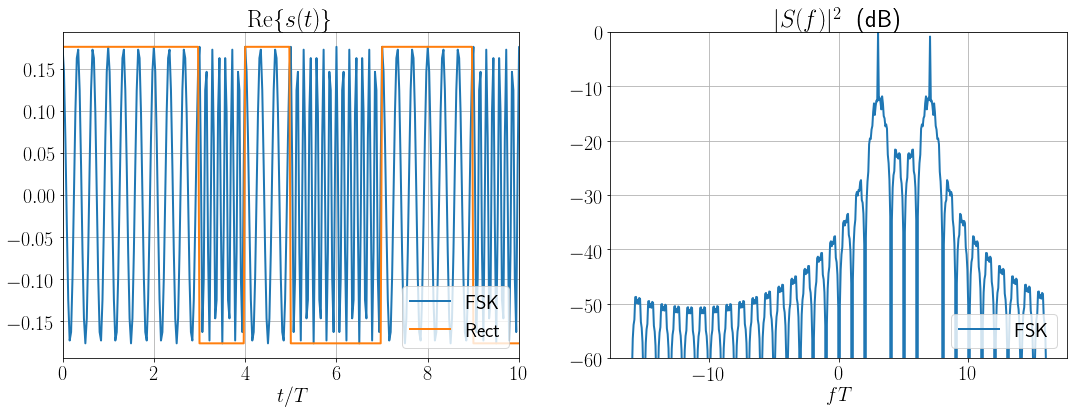

In [4]:
plt.subplot(121)
plt.plot( np.arange(len(s_up_rect))/n_up, np.real(s_up_fsk), label='FSK', linewidth=2.0)
plt.plot( np.arange(len(s_up_rect))/n_up, s_up_rect, label='Rect', linewidth=2.0)

plt.grid(True)
plt.xlabel('$t/T$')
plt.xlim( (0, 10*t_symb ) )
plt.title( '$\mathrm{Re}\{s(t)\}$' )
plt.legend( loc='lower right')


plt.subplot(122)
plt.plot( f_vec, 10*np.log10( FSK_PSD_sim ), linewidth=2.0, label='FSK' )      

plt.grid(True)    
plt.title('$|S(f)|^2 \;$ (dB)')    
plt.xlabel('$fT$')    
plt.legend( loc='lower right')
plt.ylim( (-60, 0) )